
Import libraries

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read dataset


In [296]:
df_raw = pd.read_csv('/content/laptop_price_predict/laptopPrice.csv')

Make dataset copy


In [297]:
df = df_raw.copy()

Initial dataset exploration


In [298]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [300]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


Checking what features affect the average price of a laptop


In [301]:
df['brand'].value_counts()

ASUS      249
DELL      151
Lenovo    144
HP        136
acer       51
MSI        50
APPLE      28
Avita      14
Name: brand, dtype: int64

In [302]:
def mean_price_for_string(column_name, feature):
  return df[df[column_name] == feature]['Price'].mean()

Text(0.5, 1.0, 'The average price of laptops of a given brand')

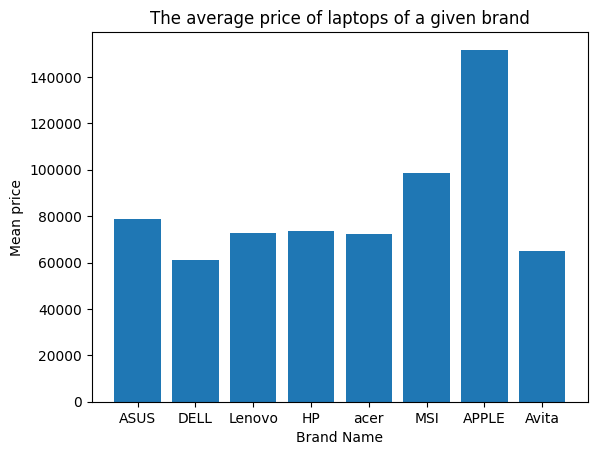

In [303]:
asus_brand_mean_price = mean_price_for_string('brand', 'ASUS')
dell_brand_mean_price = mean_price_for_string('brand', 'DELL')
lenovo_brand_mean_price = mean_price_for_string('brand', 'Lenovo')
hp_brand_mean_price = mean_price_for_string('brand', 'HP')
acer_brand_mean_price = mean_price_for_string('brand', 'acer')
msi_brand_mean_price = mean_price_for_string('brand', 'MSI')
apple_brand_mean_price = mean_price_for_string('brand', 'APPLE')
avita_brand_mean_price = mean_price_for_string('brand', 'Avita')

brands = ['ASUS', 'DELL', 'Lenovo', 'HP', 'acer', 'MSI', 'APPLE', 'Avita']
mean_prices_brands = [asus_brand_mean_price, dell_brand_mean_price, lenovo_brand_mean_price, hp_brand_mean_price, acer_brand_mean_price, msi_brand_mean_price, apple_brand_mean_price,
                      avita_brand_mean_price]

plt.bar(brands, mean_prices_brands)
plt.xlabel('Brand Name')
plt.ylabel('Mean price')
plt.title('The average price of laptops of a given brand')

In [304]:
df['processor_brand'].value_counts()

Intel    610
AMD      189
M1        24
Name: processor_brand, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given processor brand')

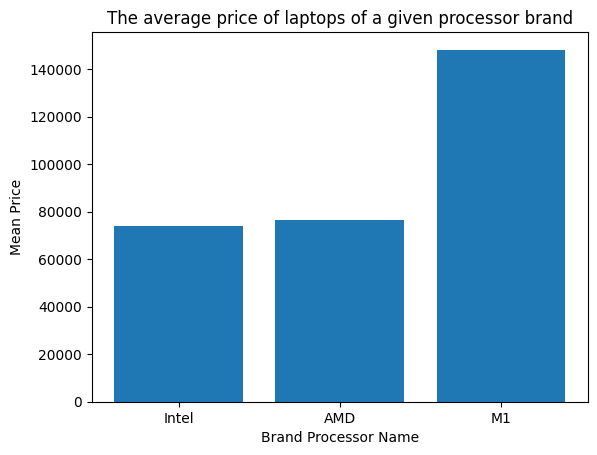

In [305]:
intel_processor_brand_mean_price = mean_price_for_string('processor_brand', 'Intel')
amd_processor_brand_mean_price = mean_price_for_string('processor_brand', 'AMD')
m1_processor_brand_mean_price = mean_price_for_string('processor_brand', 'M1')

processor_brands = ['Intel', 'AMD', 'M1']
processor_brands_mean_prices = [intel_processor_brand_mean_price, amd_processor_brand_mean_price, m1_processor_brand_mean_price]

plt.bar(processor_brands, processor_brands_mean_prices)
plt.xlabel('Brand Processor Name')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given processor brand')

In [306]:
df['processor_name'].value_counts()

Core i5         290
Core i3         164
Core i7         110
Ryzen 5          82
Ryzen 7          56
Ryzen 3          26
Ryzen 9          26
Celeron Dual     24
M1               24
Pentium Quad     13
Core i9           8
Name: processor_name, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Core i5'),
  Text(1, 0, 'Core i3'),
  Text(2, 0, 'Core i7'),
  Text(3, 0, 'Ryzen 5'),
  Text(4, 0, 'Ryzen 7'),
  Text(5, 0, 'Ryzen 3'),
  Text(6, 0, 'Ryzen 9'),
  Text(7, 0, 'Celeron Dual'),
  Text(8, 0, 'M1'),
  Text(9, 0, 'Pentium Quad'),
  Text(10, 0, 'Core i9')])

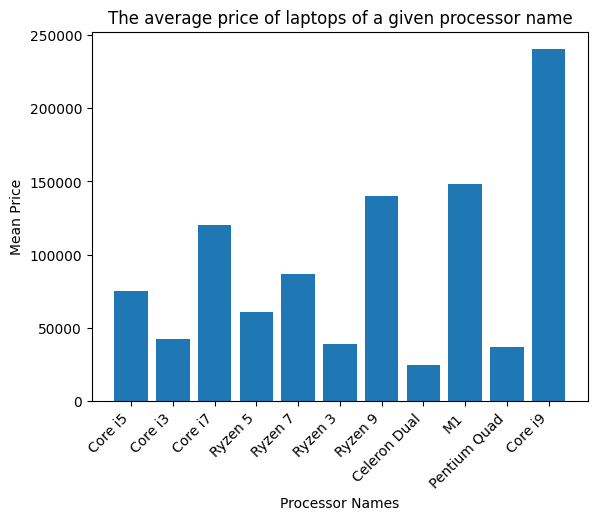

In [307]:
processors = ['Core i5', 'Core i3', 'Core i7', 'Ryzen 5', 'Ryzen 7', 'Ryzen 3', 'Ryzen 9', 'Celeron Dual', 'M1', 'Pentium Quad', 'Core i9']
processors_mean_prices = []

for processor in processors:
  mean_price = mean_price_for_string('processor_name', processor)
  processors_mean_prices.append(mean_price)


plt.bar(processors, processors_mean_prices)
plt.xlabel('Processor Names')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given processor name')
plt.xticks(rotation=45, ha='right')


Changing missing data labeled as 'Not Available' to the value that appears most often in the dataset

In [308]:
df['processor_gnrtn'].value_counts()

11th             334
Not Available    225
10th             204
8th               41
7th                9
9th                6
12th               3
4th                1
Name: processor_gnrtn, dtype: int64

In [309]:
most_common_value = df['processor_gnrtn'].value_counts().index[0]

df['processor_gnrtn'] = df['processor_gnrtn'].replace('Not Available', most_common_value)


In [310]:
df['processor_gnrtn'].value_counts()

11th    559
10th    204
8th      41
7th       9
9th       6
12th      3
4th       1
Name: processor_gnrtn, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given ram_gb type')

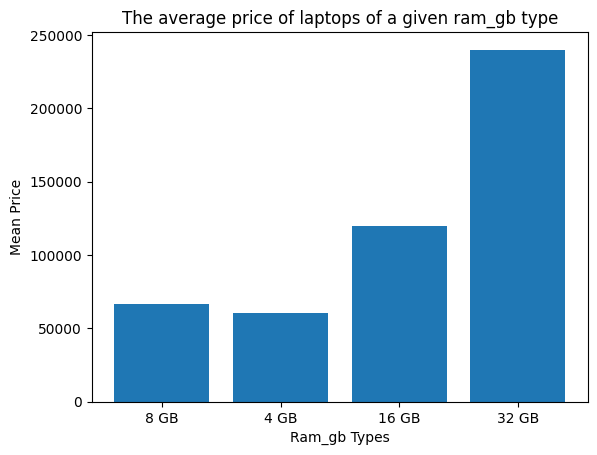

In [311]:
ram_gb_types = ['8 GB', '4 GB', '16 GB', '32 GB']
ram_gb_mean_prices = []

for ram_gb_type in ram_gb_types:
  mean_price = mean_price_for_string('ram_gb', ram_gb_type)
  ram_gb_mean_prices.append(mean_price)

plt.bar(ram_gb_types, ram_gb_mean_prices)
plt.xlabel('Ram_gb Types')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given ram_gb type')

In [312]:
df['ram_gb'].value_counts()

8 GB     418
4 GB     226
16 GB    177
32 GB      2
Name: ram_gb, dtype: int64

In [313]:
df['ram_type'].value_counts()

DDR4       709
LPDDR4X     58
LPDDR4      27
LPDDR3      14
DDR5         8
DDR3         7
Name: ram_type, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given ram type')

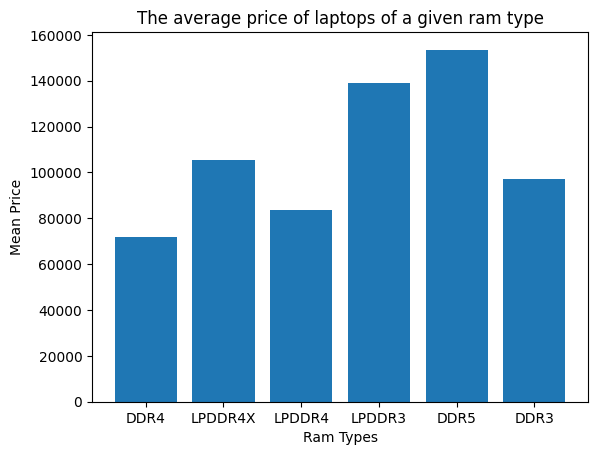

In [314]:
ram_types = ['DDR4', 'LPDDR4X', 'LPDDR4', 'LPDDR3', 'DDR5', 'DDR3']
ram_types_mean_prices = []

for ram_type in ram_types:
  mean_price = mean_price_for_string('ram_type', ram_type)
  ram_types_mean_prices.append(mean_price)

plt.bar(ram_types, ram_types_mean_prices)
plt.xlabel('Ram Types')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given ram type')

In [315]:
df['ssd'].value_counts()

512 GB     398
256 GB     184
0 GB       124
1024 GB    111
128 GB       3
2048 GB      2
3072 GB      1
Name: ssd, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given ssd memory')

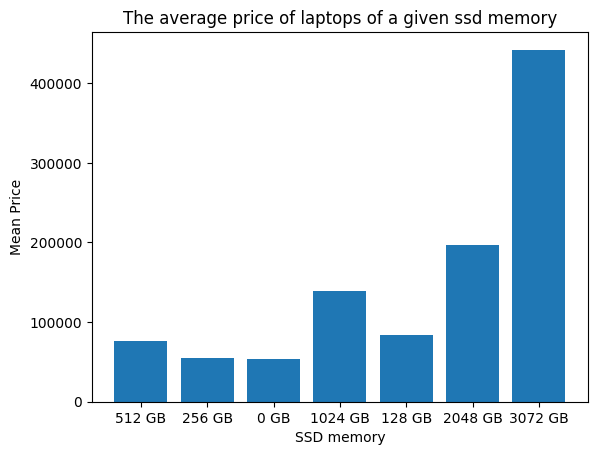

In [316]:
ssd_memory = ['512 GB', '256 GB', '0 GB', '1024 GB', '128 GB', '2048 GB', '3072 GB']
ssd_memory_mean_price = []


for ssd in ssd_memory:
  mean_price = mean_price_for_string('ssd', ssd)
  ssd_memory_mean_price.append(mean_price)


plt.bar(ssd_memory, ssd_memory_mean_price)
plt.xlabel('SSD memory')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given ssd memory')

In [317]:
df['hdd'].value_counts()

0 GB       621
1024 GB    160
512 GB      41
2048 GB      1
Name: hdd, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given hdd memory')

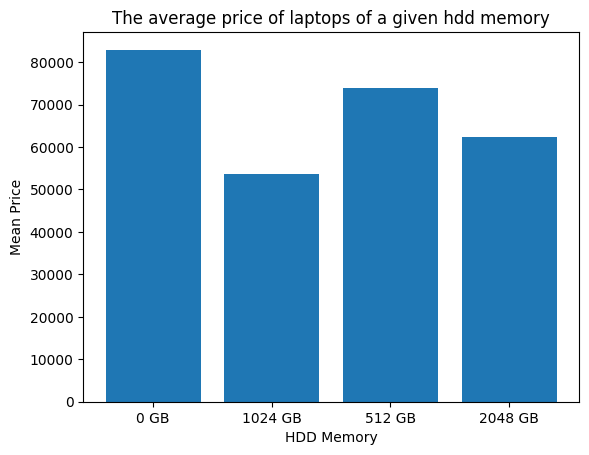

In [318]:
hdd_memory = ['0 GB', '1024 GB', '512 GB', '2048 GB']
hdd_memory_mean_price = []

for hdd in hdd_memory:
  mean_price = mean_price_for_string('hdd', hdd)
  hdd_memory_mean_price.append(mean_price)

plt.bar(hdd_memory, hdd_memory_mean_price)
plt.xlabel('HDD Memory')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given hdd memory')

In [319]:
df['os'].value_counts()

Windows    779
Mac         28
DOS         16
Name: os, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given Operating System')

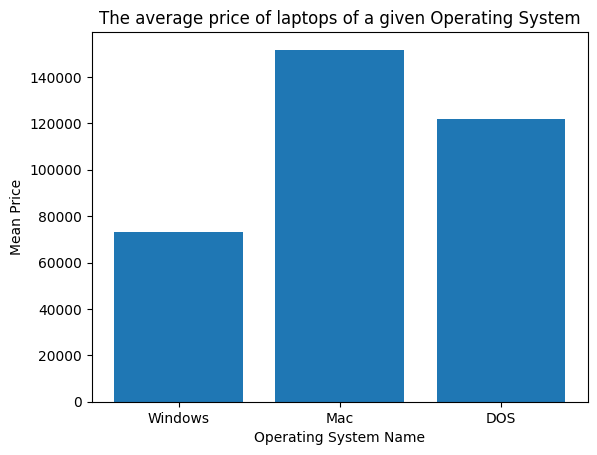

In [320]:
os_types = ['Windows', 'Mac', 'DOS']
os_mean_prices = []

for os in os_types:
  mean_price = mean_price_for_string('os', os)
  os_mean_prices.append(mean_price)

plt.bar(os_types, os_mean_prices)
plt.xlabel('Operating System Name')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given Operating System')


In [321]:
df['os_bit'].value_counts()

64-bit    714
32-bit    109
Name: os_bit, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given Operating Systems Bits')

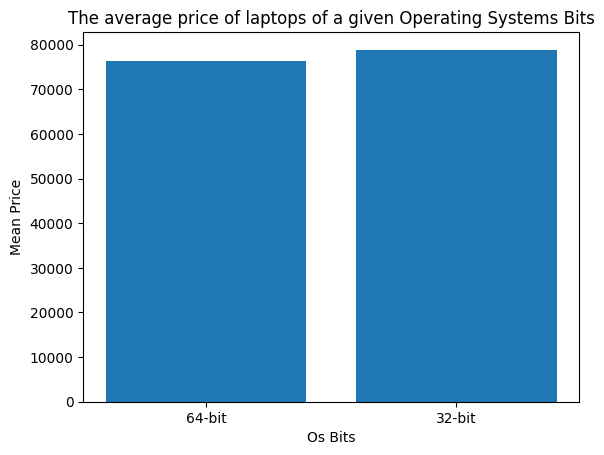

In [322]:
os_bit_type = ['64-bit', '32-bit']
os_bit_mean_price = []


for os_bit in os_bit_type:
  mean_price = mean_price_for_string('os_bit', os_bit)
  os_bit_mean_price.append(mean_price)

plt.bar(os_bit_type, os_bit_mean_price)
plt.xlabel('Os Bits')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given Operating Systems Bits')



In [323]:
df['graphic_card_gb'].value_counts()

0 GB    577
4 GB    128
2 GB     67
6 GB     37
8 GB     14
Name: graphic_card_gb, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given Graphic Cards GB')

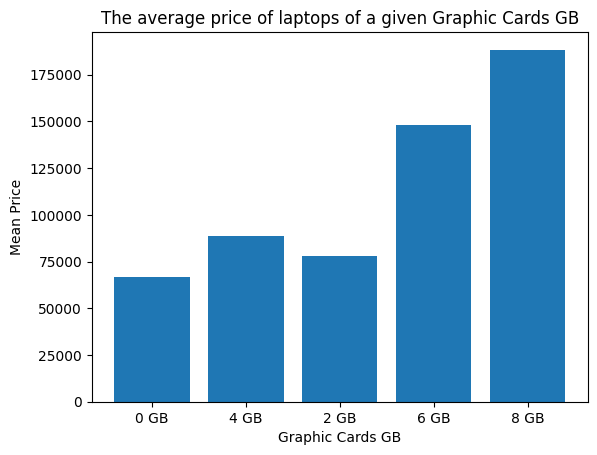

In [324]:
graphic_cards_gb = ['0 GB', '4 GB', '2 GB', '6 GB', '8 GB']
graphic_cards_mean_price = []

for graphic_card_gb in graphic_cards_gb:
  mean_price = mean_price_for_string('graphic_card_gb', graphic_card_gb)
  graphic_cards_mean_price.append(mean_price)

plt.bar(graphic_cards_gb, graphic_cards_mean_price)
plt.xlabel('Graphic Cards GB')
plt.ylabel('Mean Price')
plt.title('The average price of laptops of a given Graphic Cards GB')

In [325]:
df['weight'].value_counts()

Casual        520
ThinNlight    264
Gaming         39
Name: weight, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given Weights')

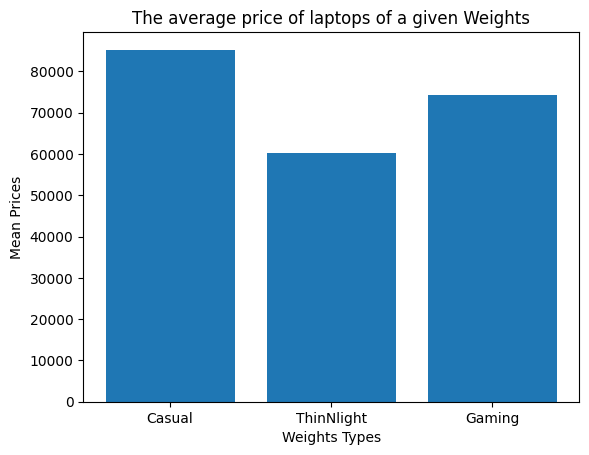

In [326]:
weights_types = ['Casual', 'ThinNlight', 'Gaming']
weights_mean_price = []

for weight in weights_types:
  mean_price = mean_price_for_string('weight', weight)
  weights_mean_price.append(mean_price)


plt.bar(weights_types, weights_mean_price)
plt.xlabel('Weights Types')
plt.ylabel('Mean Prices')
plt.title('The average price of laptops of a given Weights')

In [327]:
df['warranty'].value_counts()

1 year         509
No warranty    278
2 years         23
3 years         13
Name: warranty, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given Warranty')

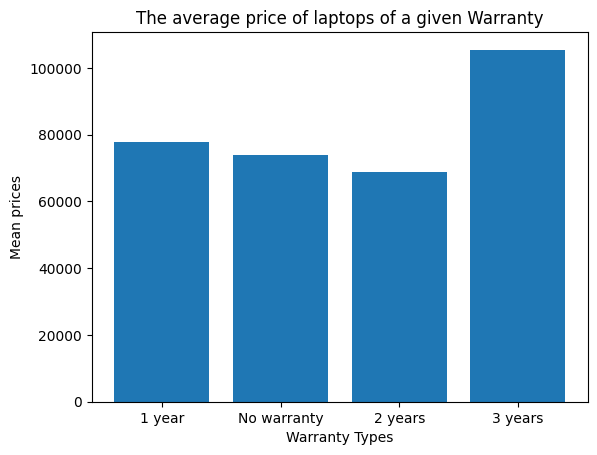

In [328]:
warranty_types = ['1 year', 'No warranty', '2 years', '3 years']
warranty_mean_prices = []


for warranty in warranty_types:
  mean_price = mean_price_for_string('warranty', warranty)
  warranty_mean_prices.append(mean_price)

plt.bar(warranty_types, warranty_mean_prices)
plt.xlabel('Warranty Types')
plt.ylabel('Mean prices')
plt.title('The average price of laptops of a given Warranty')

In [329]:
df['Touchscreen'].value_counts()

No     726
Yes     97
Name: Touchscreen, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given Touchscreen')

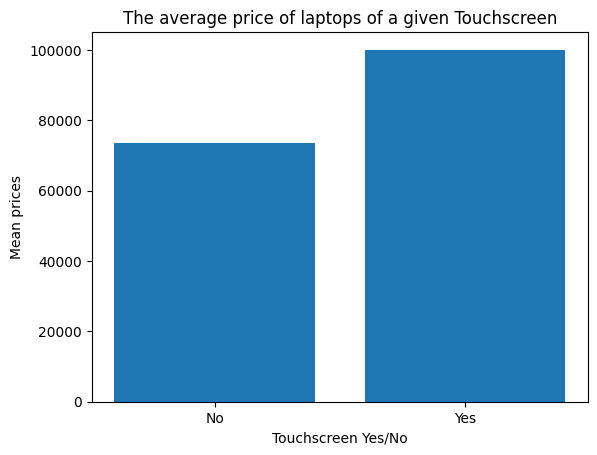

In [330]:
if_touchscreen = ['No', 'Yes']
touchscreen_mean_price = []

for touchscreen in if_touchscreen:
  mean_price = mean_price_for_string('Touchscreen', touchscreen)
  touchscreen_mean_price.append(mean_price)

plt.bar(if_touchscreen, touchscreen_mean_price)
plt.xlabel('Touchscreen Yes/No')
plt.ylabel('Mean prices')
plt.title('The average price of laptops of a given Touchscreen')

In [331]:
df['msoffice'].value_counts()


No     542
Yes    281
Name: msoffice, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given msoffice')

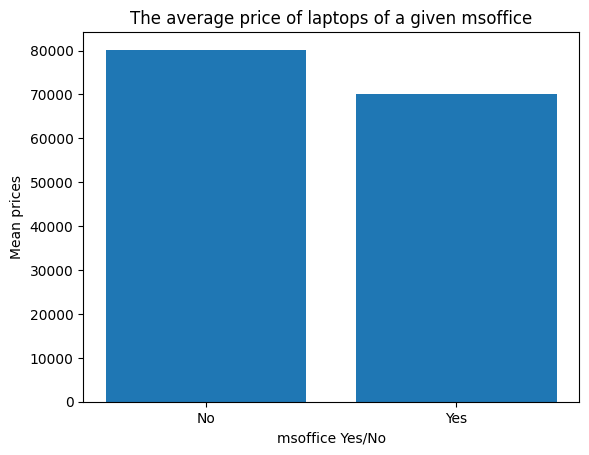

In [332]:
if_msoffice = ['No', 'Yes']
msoffice_mean_price = []

for msoffice in if_msoffice:
  mean_price = mean_price_for_string('msoffice', msoffice)
  msoffice_mean_price.append(mean_price)

plt.bar(if_msoffice, msoffice_mean_price)
plt.xlabel('msoffice Yes/No')
plt.ylabel('Mean prices')
plt.title('The average price of laptops of a given msoffice')

In [333]:
df['rating'].value_counts()

4 stars    444
3 stars    352
5 stars     16
2 stars      9
1 star       2
Name: rating, dtype: int64

Text(0.5, 1.0, 'The average price of laptops of a given rating')

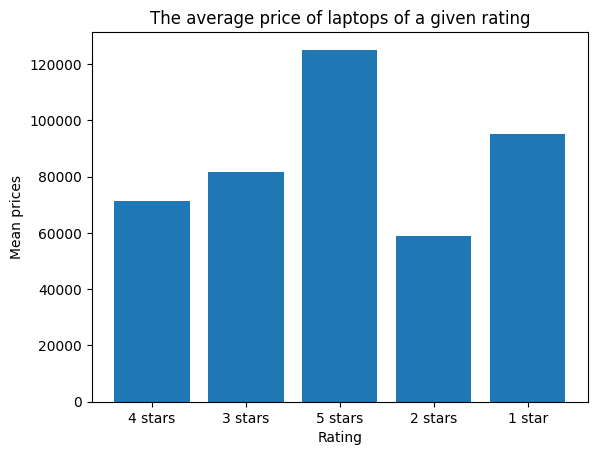

In [334]:
ratings = ['4 stars', '3 stars', '5 stars', '2 stars', '1 star']
ratings_mean_prices = []

for rating in ratings:
  mean_price = mean_price_for_string('rating', rating)
  ratings_mean_prices.append(mean_price)

plt.bar(ratings, ratings_mean_prices)
plt.xlabel('Rating')
plt.ylabel('Mean prices')
plt.title('The average price of laptops of a given rating')

Standardizing numerical variables to improve the prediction performance of the model.

In [335]:
df['Number of Ratings'].value_counts()

0       256
3        23
4        18
17       18
7        13
       ... 
216       1
262       1
1753      1
1681      1
204       1
Name: Number of Ratings, Length: 282, dtype: int64

Preparing data for machine learning.


In [336]:
df['Number of Reviews'].value_counts()

0      312
1       67
2       41
4       37
3       37
      ... 
148      1
103      1
181      1
170      1
22       1
Name: Number of Reviews, Length: 135, dtype: int64

In [337]:
from sklearn.preprocessing import StandardScaler

selected_columns = df[['Number of Ratings', 'Number of Reviews']]

scaler = StandardScaler()

selected_columns_standardized = scaler.fit_transform(selected_columns)

df_standardized = pd.DataFrame(selected_columns_standardized, columns=selected_columns.columns)

df[['Number of Ratings', 'Number of Reviews']] = df_standardized[['Number of Ratings', 'Number of Reviews']]

In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              823 non-null    object 
 1   processor_brand    823 non-null    object 
 2   processor_name     823 non-null    object 
 3   processor_gnrtn    823 non-null    object 
 4   ram_gb             823 non-null    object 
 5   ram_type           823 non-null    object 
 6   ssd                823 non-null    object 
 7   hdd                823 non-null    object 
 8   os                 823 non-null    object 
 9   os_bit             823 non-null    object 
 10  graphic_card_gb    823 non-null    object 
 11  weight             823 non-null    object 
 12  warranty           823 non-null    object 
 13  Touchscreen        823 non-null    object 
 14  msoffice           823 non-null    object 
 15  Price              823 non-null    int64  
 16  rating             823 non

Converting columns with 'no/yes' values to 0 and 1.
No -> 0
Yes -> 1

In [339]:
def swap_to_0_and_1(sample):
  if sample == 'No':
    return 0
  else:
    return 1

df['Touchscreen'] = df['Touchscreen'].apply(swap_to_0_and_1)
df['msoffice'] = df['msoffice'].apply(swap_to_0_and_1)




In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              823 non-null    object 
 1   processor_brand    823 non-null    object 
 2   processor_name     823 non-null    object 
 3   processor_gnrtn    823 non-null    object 
 4   ram_gb             823 non-null    object 
 5   ram_type           823 non-null    object 
 6   ssd                823 non-null    object 
 7   hdd                823 non-null    object 
 8   os                 823 non-null    object 
 9   os_bit             823 non-null    object 
 10  graphic_card_gb    823 non-null    object 
 11  weight             823 non-null    object 
 12  warranty           823 non-null    object 
 13  Touchscreen        823 non-null    int64  
 14  msoffice           823 non-null    int64  
 15  Price              823 non-null    int64  
 16  rating             823 non

Transforming object type columns with One-Hot Encoding.

In [341]:
df.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

In [342]:
columns_to_encode = ['brand', 'processor_brand', 'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit', 'graphic_card_gb', 'weight', 'warranty', 'rating']

In [343]:
df = pd.get_dummies(df, columns = columns_to_encode)

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 67 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   processor_name         823 non-null    object 
 1   Touchscreen            823 non-null    int64  
 2   msoffice               823 non-null    int64  
 3   Price                  823 non-null    int64  
 4   Number of Ratings      823 non-null    float64
 5   Number of Reviews      823 non-null    float64
 6   brand_APPLE            823 non-null    uint8  
 7   brand_ASUS             823 non-null    uint8  
 8   brand_Avita            823 non-null    uint8  
 9   brand_DELL             823 non-null    uint8  
 10  brand_HP               823 non-null    uint8  
 11  brand_Lenovo           823 non-null    uint8  
 12  brand_MSI              823 non-null    uint8  
 13  brand_acer             823 non-null    uint8  
 14  processor_brand_AMD    823 non-null    uint8  
 15  proces

I forgot to drop the first variables to avoid multicollinearity issues. Now I will do it manually.

In [345]:
df_before_drop = df.copy()

In [346]:
columns_to_drop = [
    'brand_APPLE', 'processor_brand_AMD', 'ram_type_DDR3', 'ssd_0 GB',
    'hdd_0 GB', 'os_DOS', 'os_bit_32-bit', 'graphic_card_gb_0 GB',
    'weight_Casual', 'warranty_1 year', 'rating_1 star'
]

df = df.drop(columns=columns_to_drop)

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   processor_name         823 non-null    object 
 1   Touchscreen            823 non-null    int64  
 2   msoffice               823 non-null    int64  
 3   Price                  823 non-null    int64  
 4   Number of Ratings      823 non-null    float64
 5   Number of Reviews      823 non-null    float64
 6   brand_ASUS             823 non-null    uint8  
 7   brand_Avita            823 non-null    uint8  
 8   brand_DELL             823 non-null    uint8  
 9   brand_HP               823 non-null    uint8  
 10  brand_Lenovo           823 non-null    uint8  
 11  brand_MSI              823 non-null    uint8  
 12  brand_acer             823 non-null    uint8  
 13  processor_brand_Intel  823 non-null    uint8  
 14  processor_brand_M1     823 non-null    uint8  
 15  proces

In [348]:
df.head()

,processor_name,Touchscreen,msoffice,Price,Number of Ratings,Number of Reviews,brand_ASUS,brand_Avita,brand_DELL,brand_HP,...,graphic_card_gb_8 GB,weight_Gaming,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,Core i3,0,0,34649,-0.298354,-0.309155,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,Core i3,0,0,38999,-0.239123,-0.268055,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,Core i3,0,0,39999,-0.293578,-0.300935,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,Core i5,0,0,69990,-0.301220,-0.309155,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,Celeron Dual,0,0,26990,-0.301220,-0.309155,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


I skipped the 'processor_name' column in the process of transforming columns using One-Hot Encoding, and I'm doing it now.

In [349]:
df = pd.get_dummies(df, columns = ['processor_name'])

In [350]:
df.head()

,Touchscreen,msoffice,Price,Number of Ratings,Number of Reviews,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,...,processor_name_Core i3,processor_name_Core i5,processor_name_Core i7,processor_name_Core i9,processor_name_M1,processor_name_Pentium Quad,processor_name_Ryzen 3,processor_name_Ryzen 5,processor_name_Ryzen 7,processor_name_Ryzen 9
0,0,0,34649,-0.298354,-0.309155,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38999,-0.239123,-0.268055,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,0,0,39999,-0.293578,-0.300935,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,69990,-0.301220,-0.309155,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,26990,-0.301220,-0.309155,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Touchscreen                  823 non-null    int64  
 1   msoffice                     823 non-null    int64  
 2   Price                        823 non-null    int64  
 3   Number of Ratings            823 non-null    float64
 4   Number of Reviews            823 non-null    float64
 5   brand_ASUS                   823 non-null    uint8  
 6   brand_Avita                  823 non-null    uint8  
 7   brand_DELL                   823 non-null    uint8  
 8   brand_HP                     823 non-null    uint8  
 9   brand_Lenovo                 823 non-null    uint8  
 10  brand_MSI                    823 non-null    uint8  
 11  brand_acer                   823 non-null    uint8  
 12  processor_brand_Intel        823 non-null    uint8  
 13  processor_brand_M1  

The data is ready now. Using the correlation matrix, we will examine the correlations between variables and the target variable 'price'.

In [352]:
import plotly.graph_objs as go
import plotly.offline as pyo

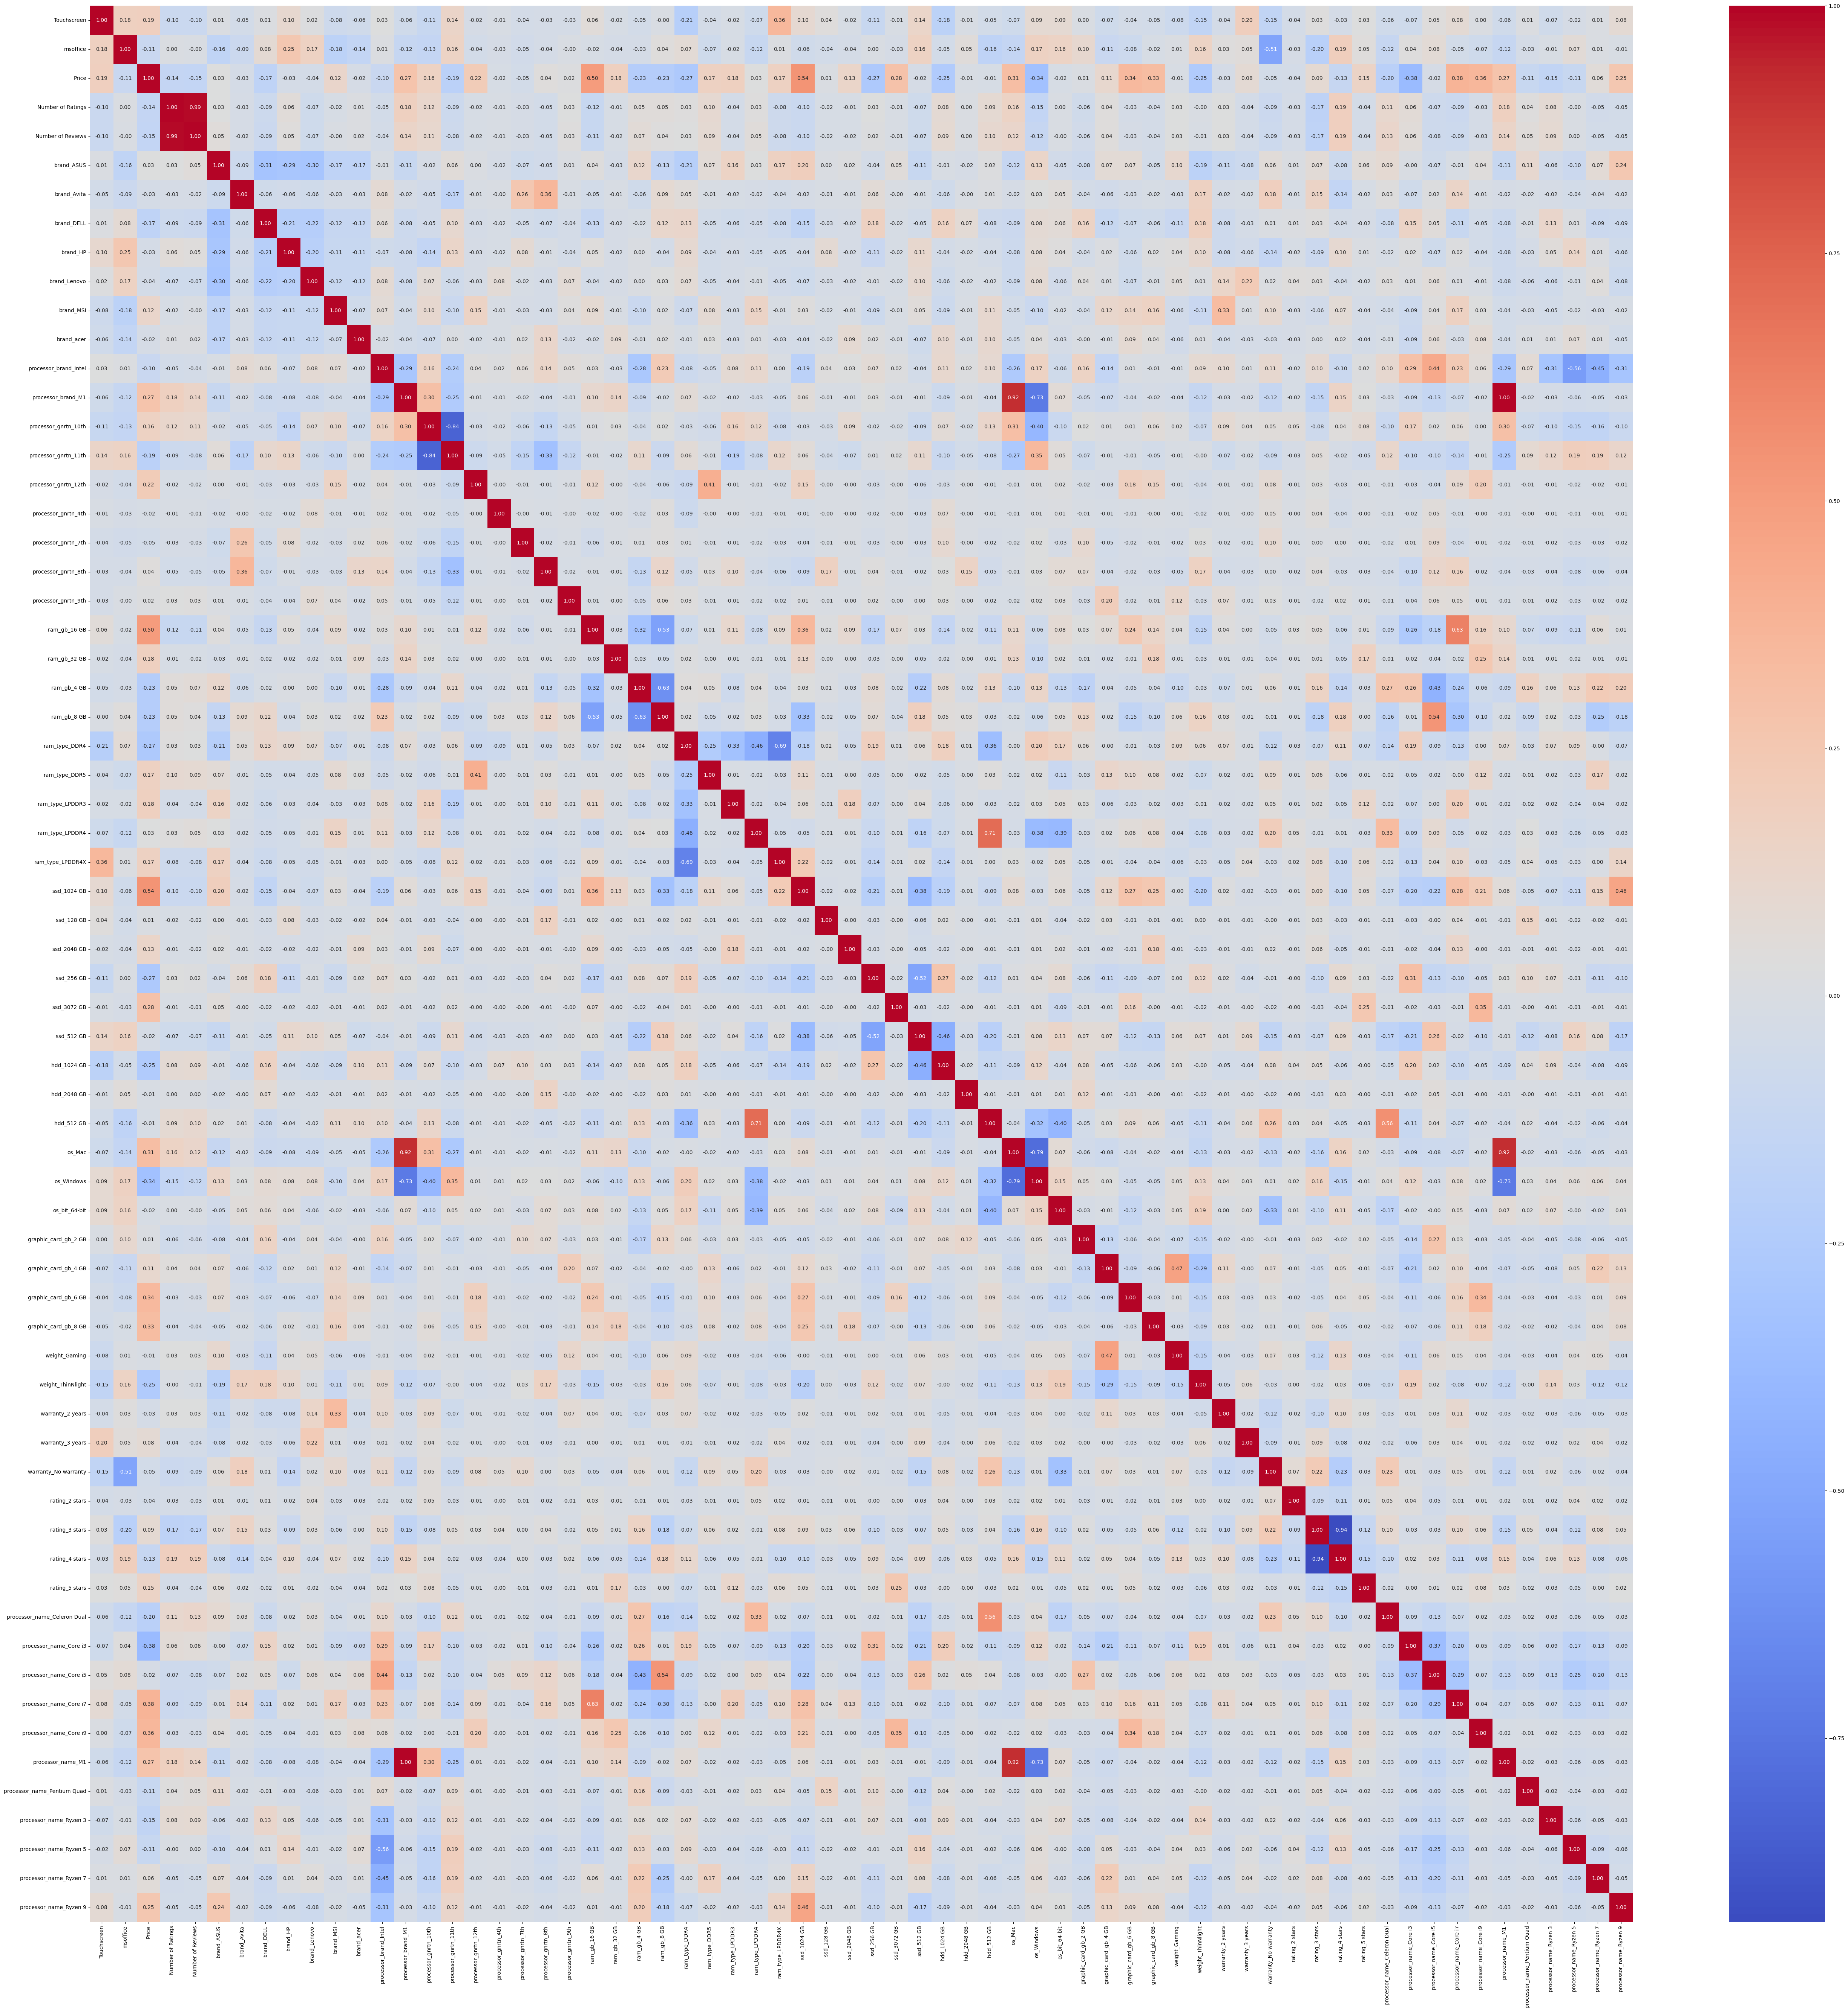

In [353]:
correlation_matrix = df.corr()

# Ustawienie rozmiarów wykresu
plt.figure(figsize=(66, 66))

# Tworzenie heatmapy
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Zapisywanie wykresu jako obraz
plt.savefig("correlation_matrix.png")

# Wyświetlanie wykresu
plt.show()

Creating a machine learning model using linear regression for predicting laptop prices.

In [354]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [355]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns = ['Price']),
    df['Price'],
    test_size = 0.2,
    random_state = 123
)



In [356]:
model = LinearRegression()

In [357]:
model.fit(X_train, y_train)

LinearRegression()

In [358]:
pred_train = model.predict(X_train)

Text(0.5, 1.0, 'Dane treningowe')

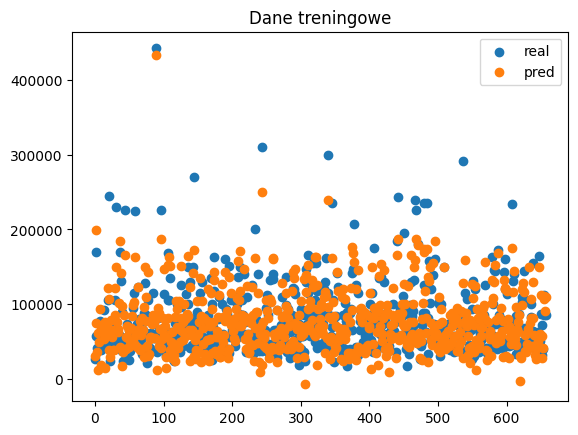

In [359]:
plt. figure()
plt.scatter(list(range(len(y_train))), y_train)
plt.scatter(list(range(len(pred_train))), pred_train)
plt.legend(['real', 'pred'])
plt.title('Dane treningowe')

In [360]:
def linear_regression_errors(y, pred, data_type = ''):
    if data_type == 'train':
        print(f"MSE error for train data: {mean_squared_error(y, pred)}")
        print(f"RMSE error for train data: {mean_squared_error(y, pred, squared=False)}")
        print(f"r2 score for train data: {r2_score(y, pred)}")
    elif data_type == 'test':
        print(f"MSE error for test data: {mean_squared_error(y, pred)}")
        print(f"RMSE error for test data: {mean_squared_error(y, pred, squared=False)}")
        print(f"r2 score for test data: {r2_score(y, pred)}")

In [361]:
linear_regression_errors(y_train, pred_train, 'train')

MSE error for train data: 457147355.4954407
RMSE error for train data: 21381.004548323745
r2 score for train data: 0.781344230110175


In [362]:
max_depth_value = 4
tree_model = DecisionTreeRegressor(max_depth = max_depth_value)

In [363]:
tree_model.fit(X_train, y_train)

pred_train_tree = tree_model.predict(X_train)

In [364]:
pred_test_tree = tree_model.predict(X_test)

In [365]:
linear_regression_errors(y_train, pred_train_tree, 'train')

MSE error for train data: 676065067.3763047
RMSE error for train data: 26001.251265589213
r2 score for train data: 0.6766348398918898


In [366]:
linear_regression_errors(y_test, pred_test_tree, 'test')

MSE error for test data: 764442737.704263
RMSE error for test data: 27648.55760621633
r2 score for test data: 0.5737555856843797


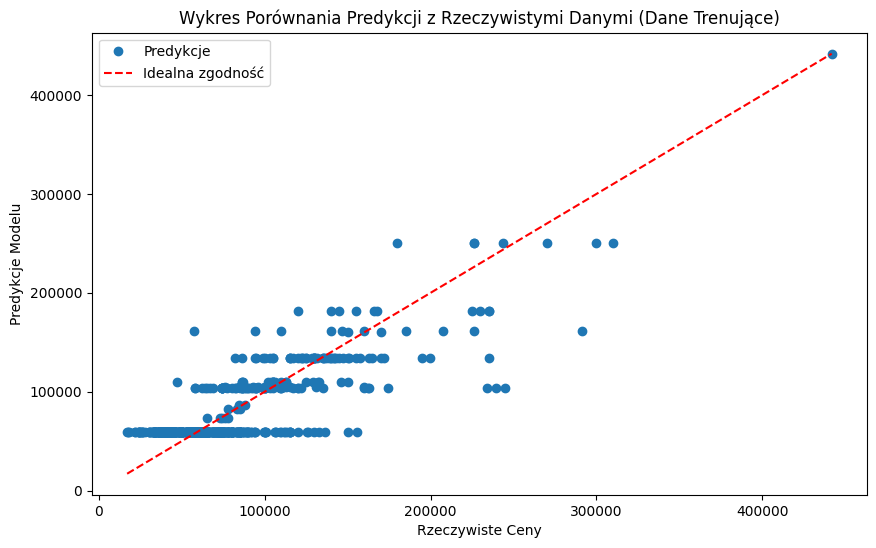

In [367]:
sorted_indices = y_train.argsort()
sorted_y_train = y_train.iloc[sorted_indices]
sorted_pred_train_tree = pred_train_tree[sorted_indices]

# Narysowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(sorted_y_train, sorted_pred_train_tree, marker='o', linestyle='None')
plt.plot(sorted_y_train, sorted_y_train, color='red', linestyle='--')  # Linia od 0 do maksymalnej wartości rzeczywistej
plt.xlabel('Rzeczywiste Ceny')
plt.ylabel('Predykcje Modelu')
plt.title('Wykres Porównania Predykcji z Rzeczywistymi Danymi (Dane Trenujące)')
plt.legend(['Predykcje', 'Idealna zgodność'])
plt.show()